# Explorando mais o Matplotlib

Nosso CEO ficou muito satisfeito com as primeiras respostas. 

__PARABÉNS!!!__

Com base naquelas respostas, agora nosso CEO deseja saber mais informações sobre o nosso conjunto de dados.



## Carregando o dataset

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
dataset = r'https://raw.githubusercontent.com/rafaelpuyau/infinity_school/main/ds/datasets/wines.csv'
df = pd.read_csv(dataset, parse_dates=['date'])

## Bônus

### Listando todos os temas disponíveis no Matplotlib

In [ ]:
plt.style.available

### Setando um tema

In [ ]:
# plt.style.use('ggplot')

# Para voltar ao padrão
plt.style.use('default')

### Mudando o plano de fundo (Background)

#### Da figura

In [ ]:
# plt.figure(facecolor='plum')

#### Do Axes

In [ ]:
# ax.set_facecolor('violet')

## Novas questões do CEO

In [ ]:
plt.style.use('dark_background')

### 1. Um gráfico com o maior e o menor preço do vinho

#### Resposta

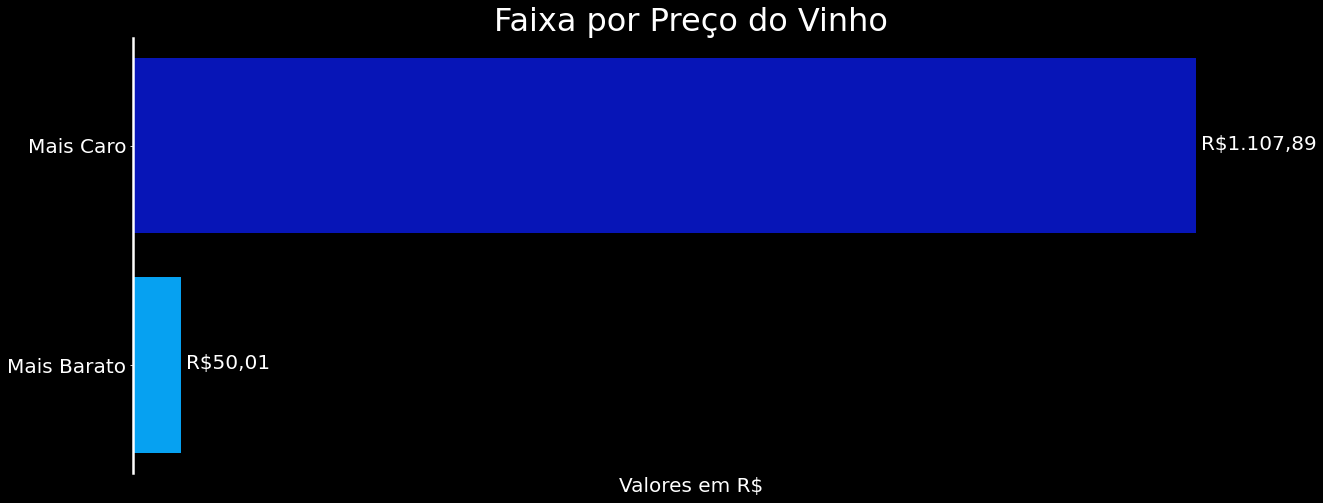

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))

minmax_df = df['price'].agg(['max', 'min'])
labels = ['Mais Caro', 'Mais Barato']
prices = [ f'R${preco:,.2f}'.translate(f'R${preco:,.2f}'.maketrans({',': '.', '.':','})) for preco in minmax_df.values ]
colors = ['#0715B7', '#06A1F1']

ax.barh(labels, minmax_df.values, color=colors)

for valor in range(len(labels)):
  ax.annotate(
      prices[valor],
      (minmax_df[valor], valor),
      ha='left',
      xytext=(5, -4),
      textcoords='offset points',
      fontsize=20
  )

ax.set_title('Faixa por Preço do Vinho', fontsize=32)
ax.set_xlabel('Valores em R$', fontsize=20)
ax.set_xticks([])
ax.set_yticklabels(labels, fontsize=20)

for border in ['top', 'right', 'bottom']:
  ax.spines[border].set_visible(False)

ax.spines['left'].set_linewidth(2.5)

# Para inverter o gráfico
ax.invert_yaxis()

plt.show()

fig.savefig('grafico_#1.png', dpi=300)

### 2. Quanto foi vendido por mês em 2021?

#### Resposta

In [ ]:
df['sub-total'] = df['quantity'].mul(df['price'])

In [ ]:
fat_mes = df.groupby(df['date'].dt.month)['sub-total'].sum().to_frame()

fat_mes.insert(0, 'month_dsc', fat_mes.index.map({
    1: 'Jan',
    2: 'Fev',
    3: 'Mar',
    4: 'Abr',
    5: 'Mai',
    6: 'Jun',
    7: 'Jul',
    8: 'Ago',
    9: 'Set',
    10: 'Out',
    11: 'Nov',
    12: 'Dez'
}))

fat_mes.reset_index(inplace=True)

fat_mes.rename(columns={'date': 'month'}, inplace=True)

fat_mes.sort_values(by='month', ascending=False, inplace=True)

In [ ]:
fat_mes

,month,month_dsc,sub-total
11,12,Dez,1322410.50
10,11,Nov,1440251.82
9,10,Out,1403307.46
8,9,Set,1431605.32
7,8,Ago,1338435.93
6,7,Jul,1479557.54
5,6,Jun,1370495.78
4,5,Mai,1450604.41
3,4,Abr,1475165.86
2,3,Mar,1462568.50


In [ ]:
[ f'R${num:_.2f}'.translate(f'R${num:_.2f}'.maketrans({'_':'.', '.': ','})) for num in fat_mes['sub-total'].to_list() ]

['R$1.322.410,50',
 'R$1.440.251,82',
 'R$1.403.307,46',
 'R$1.431.605,32',
 'R$1.338.435,93',
 'R$1.479.557,54',
 'R$1.370.495,78',
 'R$1.450.604,41',
 'R$1.475.165,86',
 'R$1.462.568,50',
 'R$1.379.481,37',
 'R$1.437.791,83']

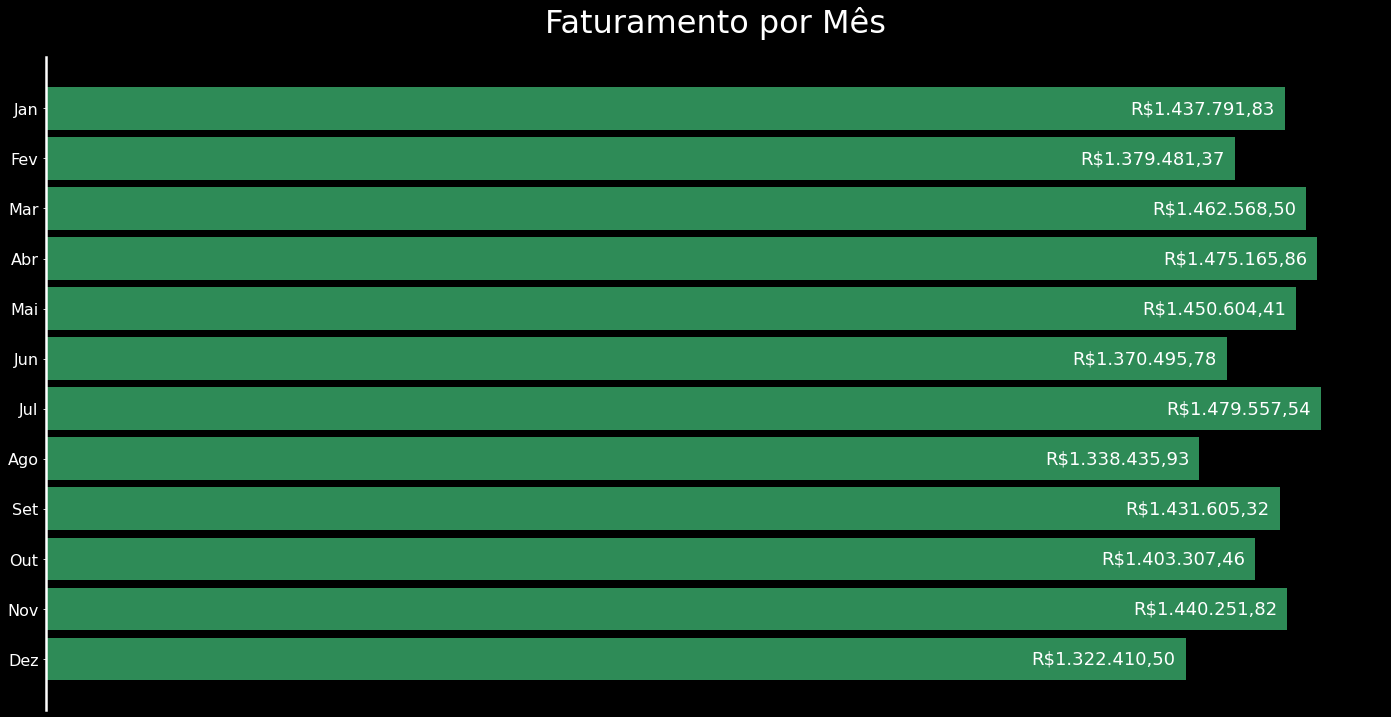

In [ ]:
fig, ax = plt.subplots(figsize=(24,12))

# ax.bar(x='month_dsc', height='sub-total', data=fat_mes.set_index('month'), width=0.5, zorder=2, color='orange')
ax.barh(fat_mes['month_dsc'], fat_mes['sub-total'], height=0.85, color='seagreen')

valores_formatados = [ f'R${num:_.2f}'.translate(f'R${num:_.2f}'.maketrans({'_':'.', '.': ','})) 
                        for num in fat_mes['sub-total'].to_list() ]

for valor in range(len(valores_formatados)):
  ax.annotate(
      valores_formatados[valor],
      (fat_mes['sub-total'].iloc[valor], valor),
      ha='right',
      xytext=(-10, -5),
      textcoords='offset points',
      fontsize=18
  )
  
ax.set_title('Faturamento por Mês', pad=25, fontsize=32)
ax.set_yticklabels(labels=fat_mes['month_dsc'], fontsize=16)
# ax.set_xticklabels(labels=fat_mes['month_dsc'], fontsize=16)
# ax.set_xlabel('Meses de 2021', fontsize=16)
# ax.set_ylabel('Valor em Milhões', fontsize=16)
# ax.set_xlim([1_000_000, 1_700_000])

# # Para tirar a notação ciêntífica
# plt.ticklabel_format(style='plain', axis='x')

# x_labels = [
#     f'{num:_}'.translate(f'{num:_}'.maketrans({'_': '.'}))
#     for num in range(1_000_000, 1_800_000, 100_000)
#     ]
ax.set_xticks([])
# ax.set_xticklabels(x_labels)

for border in ['top', 'right', 'bottom']:
  ax.spines[border].set_visible(False)

ax.spines['left'].set_linewidth(2.5)

plt.show()

fig.savefig('grafico_#2.png', dpi=300)

### 3. Os 3 meses de maior e de menor faturamento

#### Resposta

In [ ]:
display(fat_mes[-3:])
display(fat_mes[:3])

,month,month_dsc,sub-total
9,2,Mar,1462568.50
10,3,Abr,1475165.86
11,6,Jul,1479557.54


,month,month_dsc,sub-total
0,11,Dez,1322410.50
1,7,Ago,1338435.93
2,5,Jun,1370495.78


In [ ]:
fat_mes.iloc[[0, 1, 2, 9, 10, 11]]

,month,month_dsc,sub-total
0,11,Dez,1322410.50
1,7,Ago,1338435.93
2,5,Jun,1370495.78
9,2,Mar,1462568.50
10,3,Abr,1475165.86
11,6,Jul,1479557.54


[Mais sobre o método Text do Matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html)

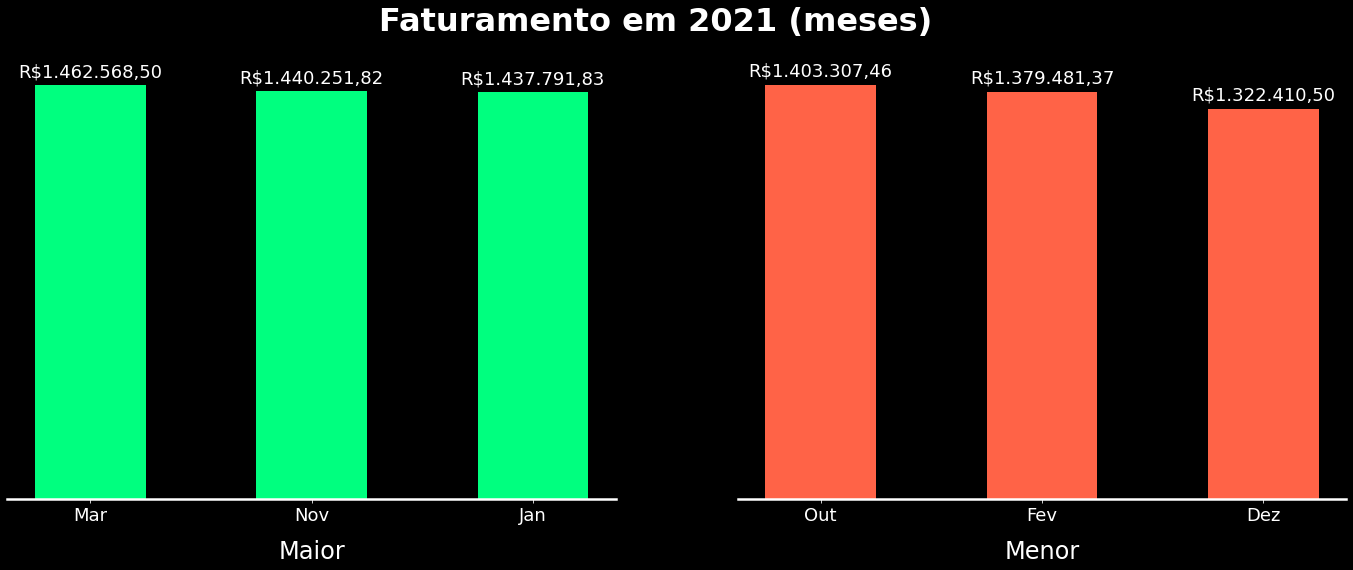

In [ ]:
# 3 meses de maior faturamento
fat_mes_3 = fat_mes.iloc[[0, 1, 2, 9, 10, 11]].copy()
fat_mes_3.sort_values(by='sub-total', ascending=False, inplace=True)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

plt.suptitle('Faturamento em 2021 (meses)', fontsize=32, fontweight='bold')

valores_formatados = [ f'R${num:_.2f}'.translate(f'R${num:_.2f}'.maketrans({'_':'.', '.': ','})) 
                        for num in fat_mes_3['sub-total'].to_list() ]

ax[0].bar(x='month_dsc', height='sub-total', data=fat_mes_3[:3].set_index('month'), width=0.5, zorder=2, color='springgreen')

for valor in range(len(fat_mes_3[:3].index)):
  ax[0].text(
      valor, 
      fat_mes_3[:3]['sub-total'].iloc[valor] + 30_000, 
      valores_formatados[valor],
      ha='center',
      fontsize=18,
      )
  
# ax[0].set_title('Maior', pad=30, fontsize=28)
ax[0].set_xticklabels(labels=fat_mes_3[:3]['month_dsc'], fontsize=18)
ax[0].set_xlabel('Maior', fontsize=24, labelpad=15)
ax[0].set_yticks([])

for border in ['top', 'right', 'left']:
  ax[0].spines[border].set_visible(False)

ax[0].spines['bottom'].set_linewidth(2.5)

ax[1].bar(x='month_dsc', height='sub-total', data=fat_mes_3[-3:].set_index('month'), width=0.5, zorder=2, color='tomato')

for valor in range(len(fat_mes_3[-3:].index)):
  ax[1].text(
      valor, 
      fat_mes_3[-3:]['sub-total'].iloc[valor] + 30_000, 
      valores_formatados[-3:][valor],
      ha='center',
      fontsize=18,
      )
  
# ax[1].set_title('Menor', pad=30, fontsize=28)
ax[1].set_xticklabels(labels=fat_mes_3[-3:]['month_dsc'], fontsize=18)
ax[1].set_xlabel('Menor', fontsize=24, labelpad=15)
ax[1].set_yticks([])

for border in ['top', 'right', 'left']:
  ax[1].spines[border].set_visible(False)

ax[1].spines['bottom'].set_linewidth(2.5)

plt.show()

fig.savefig('grafico_#3.png', dpi=300)

### 4. Quantas garrafas vendidas por mês?

#### Resposta

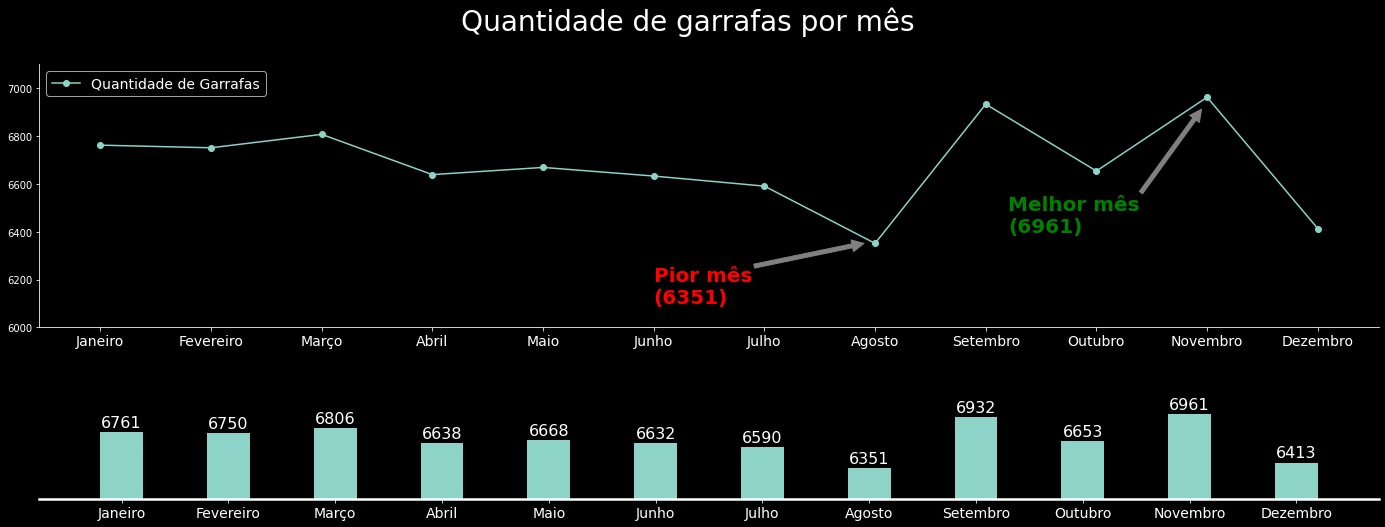

In [132]:
sales_bottle = df.groupby(df['date'].dt.month)['quantity'].sum().reset_index()
sales_bottle.rename(columns={'date': 'month'}, inplace=True)

fig, ax = plt.subplots(nrows=2,ncols=1,
                       gridspec_kw={'height_ratios': [2,1]}, figsize=(24, 8))

months = [
    'Janeiro',
    'Fevereiro',
    'Março',
    'Abril',
    'Maio',
    'Junho',
    'Julho',
    'Agosto',
    'Setembro',
    'Outubro',
    'Novembro',
    'Dezembro'
]

plt.suptitle('Quantidade de garrafas por mês', fontsize=28)

# Gráfico 1 
ax[0].plot(sales_bottle['month'], sales_bottle['quantity'], marker='o', label='Quantidade de Garrafas')
ax[0].set_xticks(sales_bottle['month'])
ax[0].set_xticklabels(labels=months, fontsize=14)
ax[0].set_ylim([6000, 7100])

# Anotação para o pior mês
ax[0].annotate(
    f'Pior mês\n({sales_bottle["quantity"].iloc[7]})',
    xy=(7.9, sales_bottle['quantity'].iloc[7]),
    xytext=(6, 6100),
    arrowprops=dict(color='grey'),
    fontsize=20,
    fontweight='bold',
    color='red'
)

# Anotação para o melhor mês
ax[0].annotate(
    f'Melhor mês\n({sales_bottle["quantity"].iloc[10]})',
    xy=(10.95, sales_bottle['quantity'].iloc[10] - 50),
    xytext=(9.2, 6400),
    arrowprops=dict(color='grey'),
    fontsize=20,
    fontweight='bold',
    color='green'
)

ax[0].legend(loc='upper left', fontsize=14)

for border in ['top', 'right']:
  ax[0].spines[border].set_visible(False)

# Gráfico 2
ax[1].bar(sales_bottle['month'], sales_bottle['quantity'], width=0.4, label='Quantidade de Garrafas')
ax[1].set_xticks(sales_bottle['month'])
ax[1].set_xticklabels(months)

for value in range(len(months)):
  ax[1].annotate(
        sales_bottle['quantity'][value],
        (sales_bottle['month'][value], sales_bottle['quantity'][value]),
        ha="center",
        xytext=(0,5),
        textcoords="offset points",
        color='white',
        fontsize=16
        )
  
ax[1].set_xticklabels(labels=months, fontsize=14)
ax[1].set_yticks([])

for border in ['top', 'left', 'right']:
  ax[1].spines[border].set_visible(False)

ax[1].spines['bottom'].set_linewidth(2.5)

ax[1].set_ylim([6000, 7500])
plt.show()

fig.savefig('grafico_#4.png', dpi=300)

### 5. Quantas garrafas vendidas por estilo no pior e no melhor mês?

#### Resposta 1

In [ ]:
# Cria uma nova coluna para o faturamento
df['fat'] = df['price'].mul(df['quantity'])

# Uma outra forma de selecionar os meses
# df[
#    (df['date'].dt.month == 7)
#    |
#    (df['date'].dt.month == 12)
# ]

# Seleciona os meses de maior e menor faturamento
q5 = df[df['date'].dt.month.isin([7, 12])]

# Agrupa por mês e estilo
df5 = q5.groupby([df['date'].dt.month, 'style'])['quantity'].sum().reset_index()

# Renomeia a coluna para um nome mais descritivo dos valores
df5.rename(columns={'date': 'month'}, inplace=True)

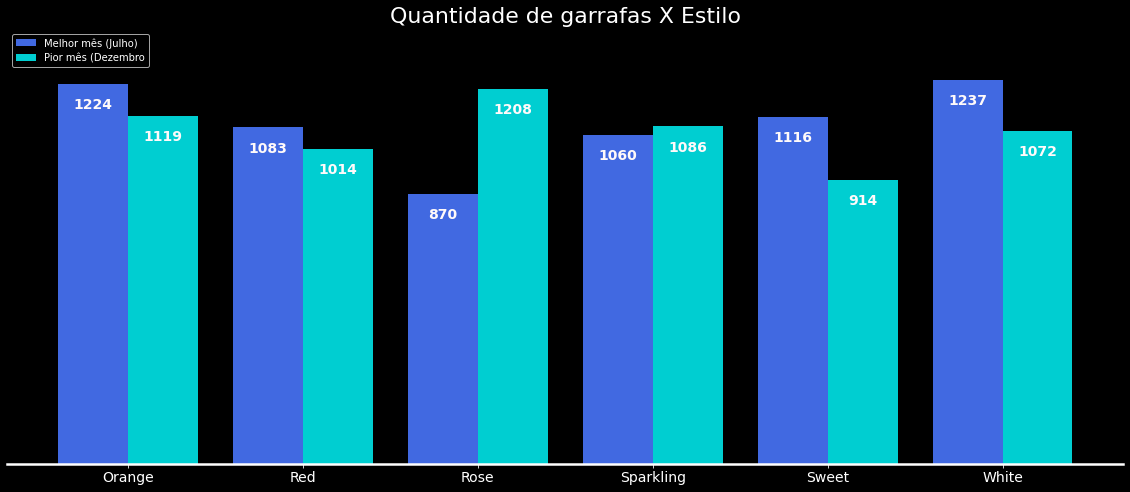

In [127]:
from matplotlib import pyplot as plt

plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(20,8))

# Largura das barras
w = .4

ax.bar(
  df5.index[:6]-w/2, 
  df5['quantity'][:6], 
  width=w, 
  label='Melhor mês (Julho)', 
  color='royalblue'
  )
ax.bar(
  df5.index[:6]+w/2, 
  df5['quantity'][6:], 
  width=w, 
  label='Pior mês (Dezembro', 
  color='darkturquoise'
  )

ax.set_title('Quantidade de garrafas X Estilo', fontsize=22)

# ax.grid(visible=True, axis='x', color='grey')
ax.set_xticks(df5.index[:6])
ax.set_xticklabels(df5['style'][:6], fontsize=14)

for i in range(len(df5.index[:6])):
  ax.annotate(
      df5['quantity'][i],
      (df5.index[i]-w/2, df5['quantity'][i]),
      ha='center',
      xytext=(0,-25),
      textcoords='offset points',
      fontsize=14,
      fontweight='bold',
      color='snow'
  )

  ax.annotate(
      df5['quantity'][i+6],
      (df5.index[i]+w/2, df5['quantity'][i+6]),
      ha='center',
      xytext=(0,-25),
      textcoords='offset points',
      fontsize=14,
      fontweight='bold',
      color='snow'
  )

ax.set_yticks([])
ax.set_ylim([0, 1400])

for border in ['top', 'right', 'left']:
  ax.spines[border].set_visible(False)

ax.spines['bottom'].set_linewidth(2.5)

plt.legend(loc='upper left')
plt.show()

fig.savefig('meu_grafico_lindao.png', dpi=300)

#### Resposta 2

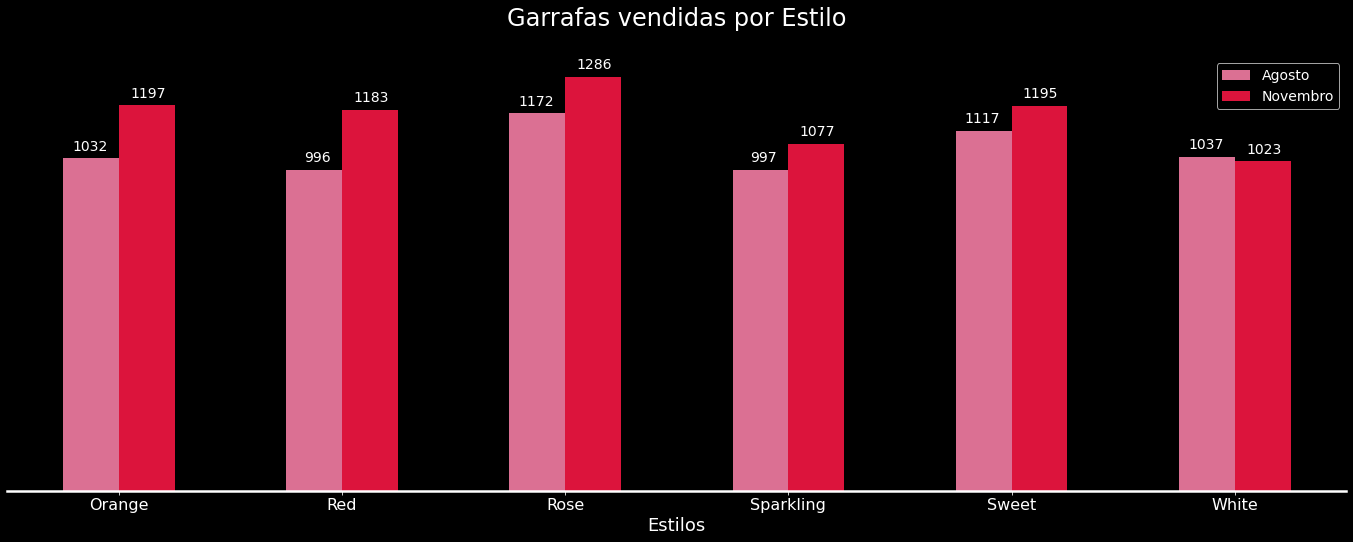

In [ ]:
df2 = df.loc[(df['date'].dt.month.isin([8, 11])),:]
bottles_styles = df2.groupby([df2['date'].dt.month, 'style'])['quantity'].sum()

# fig, ax = plt.subplots()
bottles_styles.index = pd.MultiIndex.from_tuples(bottles_styles.index, names=['Meses', 'Estilos'])

ax = bottles_styles.unstack(level=0).plot(
    kind='bar', 
    subplots=False, 
    rot=0, 
    fontsize=16, 
    figsize=(24, 8), 
    layout=(2, 3), 
    color=['palevioletred', 'crimson'],
    )

for idx in range(6):
    ax.text(
        idx - 0.05,
        bottles_styles.values[idx] + 25,
        bottles_styles.values[idx],
        ha='right',
        fontsize=14
    )
    ax.text(
        idx + 0.05,
        bottles_styles.values[idx + 6] + 25,
        bottles_styles.values[idx + 6],
        ha='left',
        fontsize=14
    )


for border in ['top', 'right', 'left']:
  ax.spines[border].set_visible(False)

ax.spines['bottom'].set_linewidth(2.5)
ax.set_yticks([])
plt.title('Garrafas vendidas por Estilo', fontsize=24, pad=30)
plt.xlabel(bottles_styles.index.names[1], fontsize=18)
plt.legend(labels=['Agosto', 'Novembro'], fontsize=14)
# plt.tight_layout()
plt.show()

fig = ax.figure
fig.savefig('grafico_#5.png', dpi=300)

In [ ]:
bottles_styles

Meses  Estilos  
8      Orange       1032
       Red           996
       Rose         1172
       Sparkling     997
       Sweet        1117
       White        1037
11     Orange       1197
       Red          1183
       Rose         1286
       Sparkling    1077
       Sweet        1195
       White        1023
Name: quantity, dtype: int64

### 6. Qual o faturamento e quantas garrafas foram vendidas por categoria por semestre?


#### Resposta

__CATEGORIAS__

* SuperPremium : vinhos acima de R$\$$600,00 

* Premium : vinhos até R$\$$600,00

* High Price : vinhos até R$\$$300,00

* Mid Price : vinhos até R$\$$200,00

* Low Price : vinhos até R$\$$100,00


In [ ]:
range_price = [0, 100, 200, 300, 600, 1200]
categories = ['Low Price', 'Mid Price', 'High Price', 'Premium', 'Super Premium']

df['categories'] = pd.cut(df['price'], bins=range_price, labels=categories)

In [ ]:
first_semester = df[df['date'].dt.month <= 6].groupby('categories')[['sub-total', 'quantity']].sum()
second_semester = df[df['date'].dt.month > 6].groupby('categories')[['sub-total', 'quantity']].sum()

In [ ]:
first_semester['quantity']

categories
Low Price         8959
Mid Price        13542
High Price        8243
Premium           9110
Super Premium      401
Name: quantity, dtype: int64

In [ ]:
fat1 = f"R${first_semester.loc['Premium'][0]:_.2f}"
fat1 = fat1.translate(fat1.maketrans({'_': '.', '.': ','}))

fat2 = f"R${second_semester.loc['Premium'][0]:_.2f}"
fat2 = fat2.translate(fat2.maketrans({'_': '.', '.': ','}))

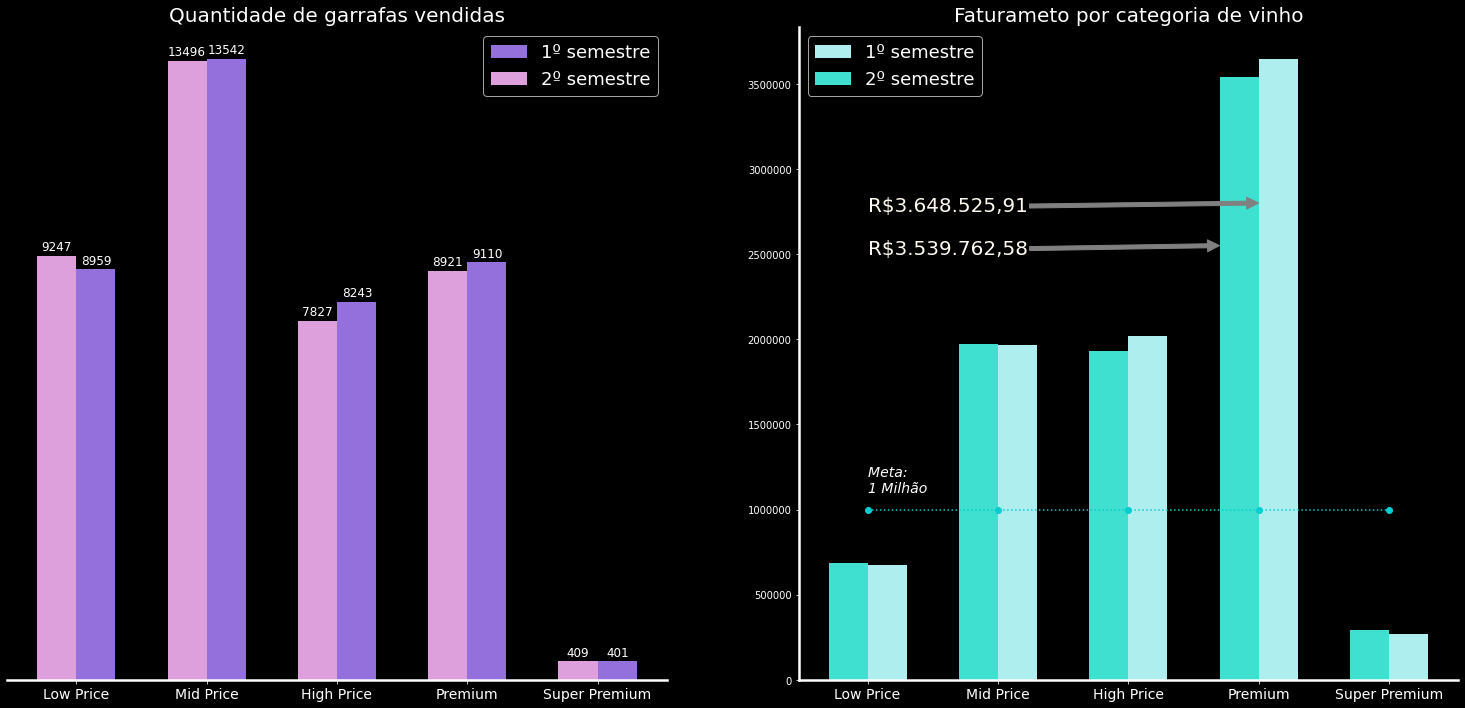

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(26, 12))

width_bar = 0.3

meta = [ 1_000_000 for _ in range(len(second_semester.index))]

ax[0].bar(first_semester.index, first_semester['quantity'], width=width_bar, align='edge', label='1º semestre', color='mediumpurple')
ax[0].bar(second_semester.index, second_semester['quantity'], width=width_bar * -1, align='edge', label='2º semestre', color='plum')

ax[1].bar(first_semester.index, first_semester['sub-total'], width=width_bar, align='edge', label='1º semestre', color='paleturquoise')
ax[1].bar(second_semester.index, second_semester['sub-total'], width=width_bar * -1, align='edge', label='2º semestre', color='turquoise')
ax[1].plot(second_semester.index, meta, linestyle='dotted', marker='o', color='darkturquoise')

# Anotação da meta de 1M
ax[1].annotate(
  f'Meta: \n1 Milhão',
  (0, 1_100_000),
  fontsize=14,
  fontstyle='italic'    
)

for value in range(len(first_semester.index)):
  ax[0].annotate(
      first_semester['quantity'][value],
      (first_semester.index[value], first_semester['quantity'][value]),
       ha="center",
       xytext=(20,5),
       textcoords="offset points",
       color='white',
       fontsize=12,
       )

for value in range(len(second_semester.index)):
  ax[0].annotate(
      second_semester['quantity'][value],
      (second_semester.index[value], second_semester['quantity'][value]),
       ha="center",
       xytext=(-20,5),
       textcoords="offset points",
       color='white',
       fontsize=12,
       )

# Anotação dos valores
ax[1].annotate(
    fat2,
    xy=(2.7, 2_550_000),
    xytext=(0, 2_500_000),
    arrowprops=dict(color='grey'),
    fontsize=20,
    color='floralwhite'
)

ax[1].annotate(
    fat1,
    xy=(3, 2_800_000),
    xytext=(0, 2_750_000),
    arrowprops=dict(color='grey'),
    fontsize=20,
    color='floralwhite'
)


# # Para tirar a notação ciêntífica
ax[1].ticklabel_format(style='plain', axis='y')
  
ax[0].set_title('Quantidade de garrafas vendidas', fontsize=20)
ax[1].set_title('Faturameto por categoria de vinho', fontsize=20)

ax[0].set_xticklabels(labels=categories, fontsize=14)
ax[1].set_xticklabels(labels=categories, fontsize=14)

ax[0].set_yticks([])

for border in ['top', 'left', 'right']:
  ax[0].spines[border].set_visible(False)

ax[0].spines['bottom'].set_linewidth(2.5)

for border in ['top', 'right']:
  ax[1].spines[border].set_visible(False)

for border in ['left', 'bottom']:
  ax[1].spines[border].set_linewidth(2.5)

ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
plt.show()

fig.savefig('grafico_#6.png', dpi=300)

## Terminamos por hoje!